# Обработка результатов задачи №305

### Параметры установки:

#### Размеры образца

In [1]:
r1 = 8.6 * 10e-3  # m
r2 = 14.5 * 10e-3  # m
h = 6.3 * 10e-3  # m

#### Элементы схемы

In [2]:
R_1 = 24  # Om
R_3 = 39000  # Оm
C = 4 * 10e-6  # F

#### Данные обмоток

In [3]:
N_1 = 500  # витков
N_2 = 570  # витков

#### Чувствительность осциллографа

In [4]:
C_x = 6.4 * 10e-3  # V/del
C_y = 10 * 10e-3  # V/del

### Расчет площади сечения образца и длины обмотки

In [5]:
import numpy as np
S = h * (r2 - r1)
l = np.pi * (r2 + r1)

### Упр 1
Вычислить величины ${H_{C},\ B_{ост},\ В_{S}\ и\ {H_{S}} }$ по измеренным величинам отрезков ОА, ОВ, ОС и OD

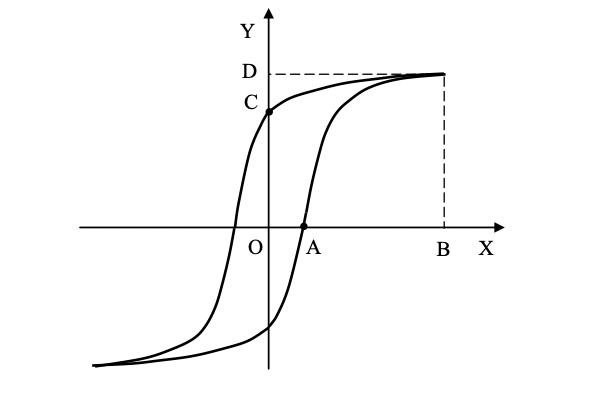

$$ H_{C} = n_1 \frac{(OA) C_X}{R_1} $$
$$ B_{ост} = \frac {R_3 C (OC) C_Y}{N_2 S}$$
$$ B_{S} = \frac {R_3 C (OD) C_Y}{N_2 S}$$
$$ H_{S} = n_1 \frac{(OB) C_X}{R_1} $$

#### 1. Сигнал на частоте ${\nu = 100\ Гц }$

In [6]:
OA = 0.3
OB = 2.2
OC = 1.0
OD = 1.9
sig = 0.1

In [7]:
H_C = N_1 / l * OA * C_x / R_1
B_o = R_3 * C * OC * C_y / N_2 / S
B_S = R_3 * C * OD * C_y / N_2 / S
H_S = N_1 / l * OB * C_x / R_1
sig_H = N_1 / l * sig * C_x / R_1
sig_B = R_3 * C * sig * C_y / N_2 / S
print(f'H_C = {H_C:.2f} \u00B1 {sig_H:.2f} \nB_oct = {B_o:.3f} \u00B1 {sig_B:.3f} \nB_S = {B_S:.3f} \u00B1 {sig_B:.3f} \nH_C = {H_S:.2f} \u00B1 {sig_H:.2f}')

H_C = 0.55 ± 0.18 
B_oct = 0.074 ± 0.007 
B_S = 0.140 ± 0.007 
H_C = 4.04 ± 0.18


#### 2. Сигнал на частоте ${\nu = 200\ Гц }$

In [8]:
OA = 0.4
OB = 1.9
OC = 1.1
OD = 1.7
sig = 0.1

In [9]:
H_C = N_1 / l * OA * C_x / R_1
B_o = R_3 * C * OC * C_y / N_2 / S
B_S = R_3 * C * OD * C_y / N_2 / S
H_S = N_1 / l * OB * C_x / R_1
sig_H = N_1 / l * sig * C_x / R_1
sig_B = R_3 * C * sig * C_y / N_2 / S
print(f'H_C = {H_C:.2f} \u00B1 {sig_H:.2f} \nB_oct = {B_o:.3f} \u00B1 {sig_B:.3f} \nB_S = {B_S:.3f} \u00B1 {sig_B:.3f} \nH_C = {H_S:.2f} \u00B1 {sig_H:.2f}')

H_C = 0.73 ± 0.18 
B_oct = 0.081 ± 0.007 
B_S = 0.125 ± 0.007 
H_C = 3.49 ± 0.18


### Упр 2

Вычислить величины H и B для каждой ступени изменения амплитуды сигнала генератора, а также относительную магнитную проницаемость ${\mu=\frac{B}{\mu_0H}}$, и построить графики ${В(Н)}$ и ${\mu(Н)}$

#### Результаты измерений

In [38]:
OB = np.array([0.4, 0.5, 0.6, 0.7, 0.7, 0.8, 1, 1.2, 1.5, 1.7, 2, 2.1, 2.2]) #дел
sig = 0.1 * np.ones(13) # дел
OD = np.array([0.4, 0.5, 0.7, 0.9, 0.9, 1, 1.2, 1.3, 1.6, 1.7, 1.9, 1.9, 1.9]) #дел

#### Подставим в формулы

In [11]:
H = N_1 / l * OB * C_x / R_1
sig_H = N_1 / l * sig * C_x / R_1
B = R_3 * C * OD * C_y / N_2 / S
sig_B = R_3 * C * sig * C_y / N_2 / S
mu0 = 1.25e-6
mu = B / mu0 / H
sig_mu = np.sqrt((sig_H / H) ** 2 + (sig_B / B) ** 2) * mu

In [32]:
import pandas as pd
data = pd.DataFrame({'H' : H, 'sig_H' : sig_H, 'B' : B, 'sig_B' : sig_B, 'mu' : mu, 'sig_mu' : sig_mu})

#### Полученные значения

In [35]:
print(data)

           H     sig_H         B     sig_B            mu        sig_mu
0   0.734915  0.183729  0.029452  0.007363  32060.499516  11335.098308
1   0.918643  0.183729  0.036815  0.007363  32060.499516   9068.078646
2   1.102372  0.183729  0.051541  0.007363  37403.916102   8210.644461
3   1.286101  0.183729  0.066267  0.007363  41220.642234   7460.121156
4   1.286101  0.183729  0.066267  0.007363  41220.642234   7460.121156
5   1.469829  0.183729  0.073630  0.007363  40075.624395   6415.230047
6   1.837287  0.183729  0.088356  0.007363  38472.599419   5008.010119
7   2.204744  0.183729  0.095720  0.007363  34732.207809   3938.945404
8   2.755930  0.183729  0.117809  0.007363  34197.866150   3125.073993
9   3.123387  0.183729  0.125172  0.007363  32060.499516   2667.081955
10  3.674573  0.183729  0.139898  0.007363  30457.474540   2211.070660
11  3.858302  0.183729  0.139898  0.007363  29007.118609   2058.822374
12  4.042030  0.183729  0.139898  0.007363  27688.613218   1925.543248


In [14]:
import matplotlib.pyplot as plt

#### Полученные зависимости

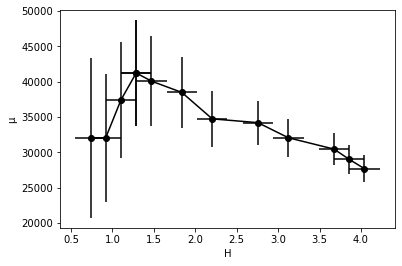

In [36]:
plt.errorbar(H, mu, xerr=sig_H, yerr=sig_mu, color='black', fmt='-o')
plt.ylabel('\u03BC', color='black')
plt.xlabel('H', color='black')
plt.show()

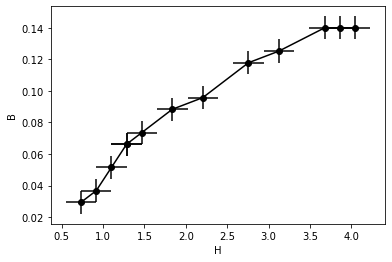

In [16]:
plt.errorbar(H, B, xerr=sig_H, yerr=sig_B, color='black', fmt='-o')
plt.ylabel('B', color='black')
plt.xlabel('H', color='black')
plt.show()

#### Максимальное значение магнитной проницаемости

In [17]:
mu_max = np.max(mu)
sig_mu_max = sig_mu[np.argmax(mu)]

In [278]:
print(f'mu_max = {mu_max:.0f} \u00B1 {sig_mu_max:.0f}')

mu_max = 41221 ± 7460
